## 1) Perform sentimental analysis on the Amazon Reviews.


In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from urllib.parse import urlencode
import csv
# Define urls 
list_of_urls =['https://www.amazon.com/Champion-Mens-Bottom-Lightweight-Jersey/product-reviews/B01MR03KP2/ref=cm_cr_arp_d_paging_btm_prev_1?ie=UTF8&reviewerType=all_reviews&pageNumber=1']

for i in range(2,440):
    list_of_urls.append( list_of_urls[0].replace('1',str(i)))

    
# Retrieve each of the url's HTML data and convert the data into a beautiful soup object.  
# Find, extract and store reviewer names and review text into a list.

score = []
reviews = []
data_string = ""

for url in list_of_urls: 
    params = {'api_key': "", 'url': url}
    response = requests.get('http://api.scraperapi.com/',   params=urlencode(params))
    soup = BeautifulSoup(response.text, 'html.parser')
    

    for item in soup.find_all('i', {'data-hook': 'review-star-rating'}):
        data_string = data_string + item.text.replace('out of 5 stars', '').strip()
        score.append(data_string)
        data_string = ""  
    
    for item in soup.find_all("span", {"data-hook": "review-body"}):
        data_string = data_string + item.get_text()
        reviews.append(data_string)
        data_string = ""
    
    
# Create the dictionary.
reviews_dict = {'rating': score, 'reviewText': reviews}

# Create a new dataframe.
df = pd.DataFrame.from_dict(reviews_dict)

df.to_csv('amazon_reviews.csv')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

In [33]:
text_data = pd.read_csv("amazon_reviews.csv")

In [34]:
text_data.head(5)

Unnamed: 0  rating                                         reviewText
0           0     5.0  Not much to write about here, but it does exac...
1           1     5.0  The product does exactly as it should and is q...
2           2     5.0  The primary job of this device is to block the...
3           3     5.0  Nice windscreen protects my MXL mic and preven...
4           4     5.0  This pop filter is great. It looks and perform...

In [35]:
# Assuming you have a DataFrame called df
text_data.drop(columns=['rating'], inplace=True)

In [36]:
text_data.head(5)

Unnamed: 0                                         reviewText
0           0  Not much to write about here, but it does exac...
1           1  The product does exactly as it should and is q...
2           2  The primary job of this device is to block the...
3           3  Nice windscreen protects my MXL mic and preven...
4           4  This pop filter is great. It looks and perform...

In [37]:
# Assuming you have a DataFrame called df
text_data.drop(columns=['Unnamed: 0'], inplace=True)

In [38]:
text_data.head(5)

reviewText
0  Not much to write about here, but it does exac...
1  The product does exactly as it should and is q...
2  The primary job of this device is to block the...
3  Nice windscreen protects my MXL mic and preven...
4  This pop filter is great. It looks and perform...

In [39]:
text_data.isnull().sum()

reviewText    7
dtype: int64

In [40]:
# Assuming you have a DataFrame called df
text_data.dropna(inplace=True)

In [41]:
text_data.isnull().sum()

reviewText    0
dtype: int64

In [42]:
text_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10254 entries, 0 to 10260
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   reviewText  10254 non-null  object
dtypes: object(1)
memory usage: 160.2+ KB


In [43]:
# Assuming you have a DataFrame called df
text_data.rename(columns={'reviewText': 'Text'}, inplace=True)

In [44]:
text_data.head(5)

Text
0  Not much to write about here, but it does exac...
1  The product does exactly as it should and is q...
2  The primary job of this device is to block the...
3  Nice windscreen protects my MXL mic and preven...
4  This pop filter is great. It looks and perform...

## Data Cleaning

### Removing irrelevant information (e.g., URLs, special characters).

In [45]:
import re #regular expression
import string

def clean_text(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub("[0-9" "]+"," ",text)
    text = re.sub('[‘’“”…]', '', text)
    return text

clean = lambda x: clean_text(x)

In [46]:
text_data['Text'] = text_data.Text.apply(clean)
text_data.Text

0        not much to write about here but it does exact...
1        the product does exactly as it should and is q...
2        the primary job of this device is to block the...
3        nice windscreen protects my mxl mic and preven...
4        this pop filter is great it looks and performs...
                               ...                        
10256                 great just as expected  thank to all
10257    ive been thinking about trying the nanoweb str...
10258    i have tried coated strings in the past  inclu...
10259    well made by elixir and developed with taylor ...
10260    these strings are really quite good but i woul...
Name: Text, Length: 10254, dtype: object

### Lowercasing: Converting all text to lowercase for consistency.

In [47]:
# Apply lowercasing to the 'Text' column
text_data['Text'] = text_data['Text'].apply(lambda x: x.lower())

# Print the DataFrame
print(text_data)

                                                    Text
0      not much to write about here but it does exact...
1      the product does exactly as it should and is q...
2      the primary job of this device is to block the...
3      nice windscreen protects my mxl mic and preven...
4      this pop filter is great it looks and performs...
...                                                  ...
10256               great just as expected  thank to all
10257  ive been thinking about trying the nanoweb str...
10258  i have tried coated strings in the past  inclu...
10259  well made by elixir and developed with taylor ...
10260  these strings are really quite good but i woul...

[10254 rows x 1 columns]


In [48]:
#Word frequency
freq = pd.Series(' '.join(text_data['Text']).split()).value_counts()[:20] # for top 20
freq

the     43900
a       27852
and     26852
i       26528
to      23005
it      20466
is      14560
of      13568
for     13136
this    12622
my       9368
that     9238
with     9141
on       9098
you      8991
in       8725
but      7786
have     7114
are      5784
not      5729
dtype: int64

### Removing stop words: Common words like "and," "the," "is" are often removed using custom stop words list and also inbuilt stop word list

In [49]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords') # Download the stopwords dataset

# Load custom stop words from an external file
custom_stop_words_file = 'stop.txt'
with open(custom_stop_words_file, 'r') as file:
    custom_stop_words = [line.strip() for line in file]

# Get the list of NLTK's inbuilt English stop words
inbuilt_stop_words = set(stopwords.words('english'))

# Combine custom and inbuilt stop words into a single set
stop_words = set(custom_stop_words).union(inbuilt_stop_words)

# Define a function to remove stop words
def remove_stop_words(text):
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)

# Apply the remove_stop_words function to the 'Text' column
text_data['Text'] = text_data['Text'].apply(remove_stop_words)

# Print the DataFrame
print(text_data)

                                                    Text
0      write supposed filters pop sounds recordings c...
1      product affordablei realized double screened a...
2      primary job device block breath produce poppin...
3      nice windscreen protects mxl mic prevents pops...
4      pop filter great performs studio filter youre ...
...                                                  ...
10256                                     great expected
10257  ive thinking nanoweb strings bit put high pric...
10258  coated strings past including elixirs fond fel...
10259  made elixir developed taylor guitars strings d...
10260  strings good wouldnt call perfect unwound stri...

[10254 rows x 1 columns]


[nltk_data] Downloading package stopwords to C:\Users\Vinith
[nltk_data]     MH\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [50]:
#Word frequency
freq = pd.Series(' '.join(text_data['Text']).split()).value_counts()[:20] # for top 20
freq

guitar     5383
great      3979
good       3672
sound      3485
strings    3320
pedal      2500
price      2127
dont       2062
amp        1960
works      1833
ive        1827
quality    1729
nice       1667
im         1601
time       1496
tone       1480
easy       1436
bought     1398
strap      1361
stand      1306
dtype: int64

In [ ]:
#Stemming
from nltk.stem import PorterStemmer
ps = PorterStemmer()
stemmed_tokens = [ps.stem(word) for word in text_data['Text']]
print(stemmed_tokens[0:40])

### Lemmatization: Reducing words to their base form.

In [51]:
import pandas as pd
import nltk
from nltk.stem import WordNetLemmatizer

# Download the WordNet dataset (if not already downloaded)
nltk.download('wordnet')

# Initialize the WordNet lemmatizer
lemmatizer = WordNetLemmatizer()

# Define a function to lemmatize a sentence
def lemmatize_sentence(sentence):
    words = nltk.word_tokenize(sentence)
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    return " ".join(lemmatized_words)

# Apply the lemmatization function to the 'text' column
text_data['Text'] = text_data['Text'].apply(lemmatize_sentence)

# Print the DataFrame with the lemmatized text
print(text_data)

[nltk_data] Downloading package wordnet to C:\Users\Vinith
[nltk_data]     MH\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


                                                    Text
0      write supposed filter pop sound recording cris...
1      product affordablei realized double screened a...
2      primary job device block breath produce poppin...
3      nice windscreen protects mxl mic prevents pop ...
4      pop filter great performs studio filter youre ...
...                                                  ...
10256                                     great expected
10257  ive thinking nanoweb string bit put high price...
10258  coated string past including elixir fond felt ...
10259  made elixir developed taylor guitar string des...
10260  string good wouldnt call perfect unwound strin...

[10254 rows x 1 columns]


### Sentiment Labeling: Assigning labels to the data to indicate sentiment polarity, such as positive, negative, or neutral.  

In [52]:
# Initialize empty lists for positive and negative words
positive_words = []
negative_words = []

# Read positive words from the text file into the positive_words list
with open('positive-words.txt', 'r') as file:
    for line in file:
        positive_words.append(line.strip())  # Remove newline characters and add to the list

# Read negative words from the text file into the negative_words list
with open('negative-words.txt', 'r') as file:
    for line in file:
        negative_words.append(line.strip())  # Remove newline characters and add to the list

# Function to classify sentiment
def classify_sentiment(text):
    words = text.split()  # Split the text into words
    num_positive = sum(1 for word in words if word.lower() in positive_words)
    num_negative = sum(1 for word in words if word.lower() in negative_words)
    
    if num_positive > num_negative:
        return 'positive'
    elif num_negative > num_positive:
        return 'negative'
    else:
        return 'neutral'

# Apply the sentiment classification function to the DataFrame
text_data['sentiment'] = text_data['Text'].apply(classify_sentiment)

# Print the DataFrame with sentiment labels
print(text_data)

                                                    Text sentiment
0      write supposed filter pop sound recording cris...  positive
1      product affordablei realized double screened a...   neutral
2      primary job device block breath produce poppin...  positive
3      nice windscreen protects mxl mic prevents pop ...  negative
4      pop filter great performs studio filter youre ...  positive
...                                                  ...       ...
10256                                     great expected  positive
10257  ive thinking nanoweb string bit put high price...  positive
10258  coated string past including elixir fond felt ...  positive
10259  made elixir developed taylor guitar string des...  positive
10260  string good wouldnt call perfect unwound strin...  positive

[10254 rows x 2 columns]


In [56]:
text_data.head(5)

Text sentiment
0  write supposed filter pop sound recording cris...  positive
1  product affordablei realized double screened a...   neutral
2  primary job device block breath produce poppin...  positive
3  nice windscreen protects mxl mic prevents pop ...  negative
4  pop filter great performs studio filter youre ...  positive

### N grams using Count Vectorizer. 

In [82]:
# Import CountVectorizer from sklearn
from sklearn.feature_extraction.text import CountVectorizer

# Create a list of values from the Name column
texts_list = text_data['Text'].tolist()
print(texts_list)

# Create a CountVectorizer object
cv = CountVectorizer(analyzer='word',ngram_range=(1,3),max_features = 1000)

# Fit the object with the texts
cv.fit(texts_list)

# Get the feature names
cv.get_feature_names_out()

['write supposed filter pop sound recording crisp lowest price pop filter amazon buy honestly work pricing', 'product affordablei realized double screened arrived expectedas added bonus screen carry small hint smell grape candy buy reminiscents sake stop putting pop filter nose smelling recording dif needed pop filter work expensive pleasing aroma mine didbuy product', 'primary job device block breath produce popping sound allowing voice pas noticeable reduction volume high frequency double cloth filter block pop let voice coloration metal clamp mount attache mike stand secure attached goose neck coaxing stay put', 'nice windscreen protects mxl mic prevents pop thing gooseneck marginally hold screen position requires careful positioning clamp avoid sagging', 'pop filter great performs studio filter youre recording vocal eliminate pop recorded sing', 'good bought love heavy cord gold connector bass sound great learned night coil guess read instruction carefully harm work great', 'monste

array(['ability', 'absolutely', 'ac', 'accessory', 'accurate', 'acoustic',
       'acoustic electric', 'acoustic guitar', 'action', 'actual',
       'adapter', 'add', 'added', 'adding', 'addition', 'additional',
       'adjust', 'adjustable', 'adjusted', 'adjustment', 'advertised',
       'afford', 'affordable', 'ago', 'amazing', 'amazon', 'american',
       'amount', 'amp', 'amp sound', 'amplifier', 'analog', 'angle',
       'annoying', 'appears', 'application', 'area', 'arent', 'arm',
       'arrived', 'attach', 'attached', 'attack', 'audio', 'average',
       'awesome', 'baby', 'back', 'bad', 'bag', 'balanced', 'ball',
       'band', 'banjo', 'bar', 'barely', 'base', 'based', 'basic',
       'basically', 'bass', 'bass guitar', 'battery', 'beat', 'beautiful',
       'beginner', 'behringer', 'bend', 'big', 'big deal', 'bigger',
       'bit', 'black', 'blue', 'board', 'body', 'book', 'boom', 'boost',
       'bos', 'bottom', 'bought', 'box', 'brand', 'break', 'breaking',
       'bridge'

### N grams using TFIDF Vectorizer. 

In [83]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize and fit the TfidfVectorizer object
tfidf_vectorizer = TfidfVectorizer(analyzer='word',ngram_range=(1,3),max_features = 1000)
tfidf_matrix = tfidf_vectorizer.fit_transform(texts_list)

# Get the feature names
feature_names = tfidf_vectorizer.get_feature_names_out()
print(feature_names)

['ability' 'absolutely' 'ac' 'accessory' 'accurate' 'acoustic'
 'acoustic electric' 'acoustic guitar' 'action' 'actual' 'adapter' 'add'
 'added' 'adding' 'addition' 'additional' 'adjust' 'adjustable' 'adjusted'
 'adjustment' 'advertised' 'afford' 'affordable' 'ago' 'amazing' 'amazon'
 'american' 'amount' 'amp' 'amp sound' 'amplifier' 'analog' 'angle'
 'annoying' 'appears' 'application' 'area' 'arent' 'arm' 'arrived'
 'attach' 'attached' 'attack' 'audio' 'average' 'awesome' 'baby' 'back'
 'bad' 'bag' 'balanced' 'ball' 'band' 'banjo' 'bar' 'barely' 'base'
 'based' 'basic' 'basically' 'bass' 'bass guitar' 'battery' 'beat'
 'beautiful' 'beginner' 'behringer' 'bend' 'big' 'big deal' 'bigger' 'bit'
 'black' 'blue' 'board' 'body' 'book' 'boom' 'boost' 'bos' 'bottom'
 'bought' 'box' 'brand' 'break' 'breaking' 'bridge' 'bright' 'brighter'
 'bring' 'broke' 'broken' 'bronze' 'buck' 'budget' 'build' 'build quality'
 'built' 'bunch' 'button' 'buy' 'buying' 'buzz' 'bypass' 'cabinet' 'cable'
 'call' 

# Word Cloud 

In [91]:
text_string = " ".join(texts_list)
print(texts_list)

['write supposed filter pop sound recording crisp lowest price pop filter amazon buy honestly work pricing', 'product affordablei realized double screened arrived expectedas added bonus screen carry small hint smell grape candy buy reminiscents sake stop putting pop filter nose smelling recording dif needed pop filter work expensive pleasing aroma mine didbuy product', 'primary job device block breath produce popping sound allowing voice pas noticeable reduction volume high frequency double cloth filter block pop let voice coloration metal clamp mount attache mike stand secure attached goose neck coaxing stay put', 'nice windscreen protects mxl mic prevents pop thing gooseneck marginally hold screen position requires careful positioning clamp avoid sagging', 'pop filter great performs studio filter youre recording vocal eliminate pop recorded sing', 'good bought love heavy cord gold connector bass sound great learned night coil guess read instruction carefully harm work great', 'monste

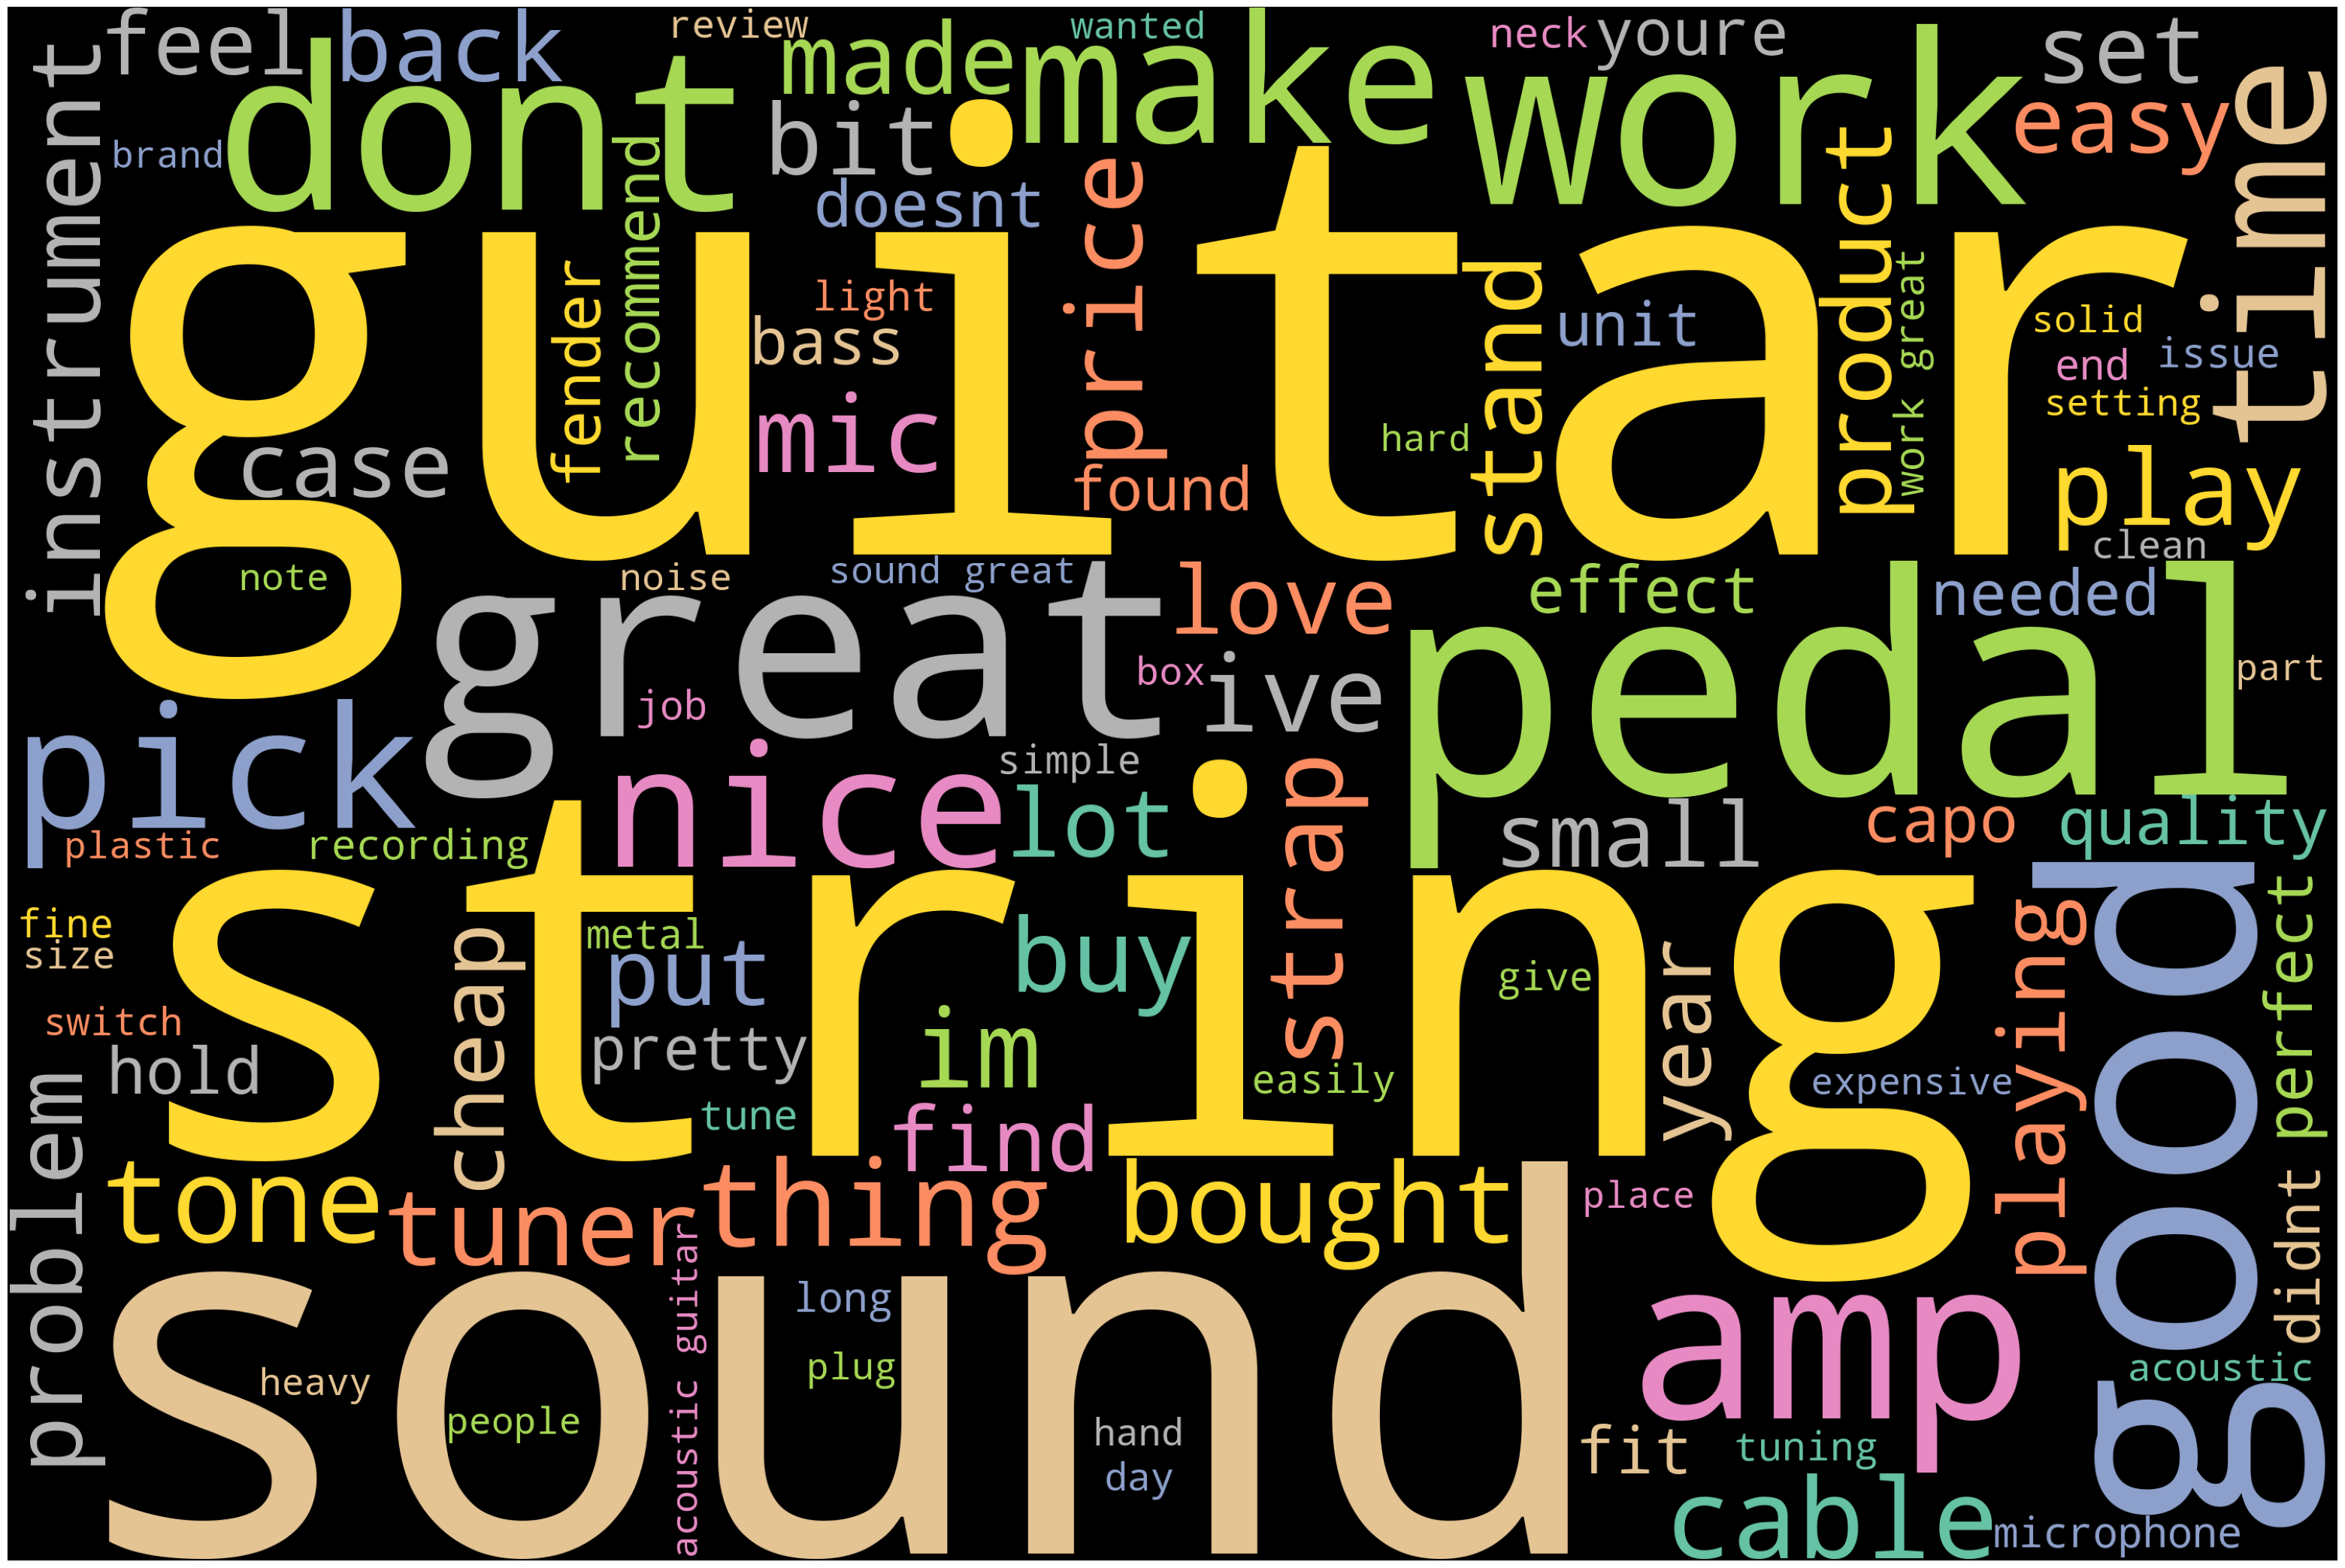

In [92]:
# Import packages
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");
    
# Generate wordcloud
stopwords = STOPWORDS
stopwords.add('will')
wordcloud = WordCloud(width = 3000, height = 2000, background_color='black', max_words=100,colormap='Set2',stopwords=stopwords).generate(text_string)
# Plot
plot_cloud(wordcloud)

In [93]:
# Save image
wordcloud.to_file("amazon_review.png")

### Feature Extraction: Term Frequency-Inverse Document Frequency (TF-IDF): Assigning weights to words based on their importance in a document relative to the entire dataset.

In [84]:
from sklearn.preprocessing import LabelEncoder

# Create an instance of the LabelEncoder
encoder = LabelEncoder()

# Fit and transform the sentiment labels
text_data['sentiment_encoded'] = encoder.fit_transform(text_data['sentiment'])

In [85]:
text_data.head(5)

Text sentiment  \
0  write supposed filter pop sound recording cris...  positive   
1  product affordablei realized double screened a...   neutral   
2  primary job device block breath produce poppin...  positive   
3  nice windscreen protects mxl mic prevents pop ...  negative   
4  pop filter great performs studio filter youre ...  positive   

   sentiment_encoded  
0                  2  
1                  1  
2                  2  
3                  0  
4                  2

### Count of each sentiment.

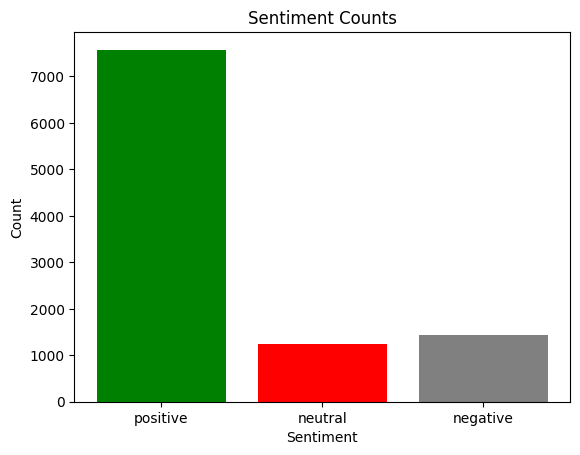

In [96]:
import matplotlib.pyplot as plt
from collections import Counter

# Count the occurrences of each sentiment
sentiment_counts = Counter(text_data.sentiment)

# Extract sentiment labels and counts
labels = list(sentiment_counts.keys())
counts = list(sentiment_counts.values())

# Create a bar chart
plt.bar(labels, counts, color=['green', 'red', 'gray'])

# Add labels and title
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.title("Sentiment Counts")

# Show the bar chart
plt.show()


In [97]:
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=1000)  # You can adjust the max_features as needed
X = tfidf_vectorizer.fit_transform(text_data['Text'])
y = text_data['sentiment_encoded']

# Model building using various classification models.  

In [98]:
# Importing train - test split , K-fold Cross validation and accuracy score and classification report 

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import StratifiedKFold, cross_val_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize an empty DataFrame to store the results
result_df = pd.DataFrame(columns=["Model", "Accuracy"])

In [99]:
from sklearn.linear_model import LogisticRegression

# Train and evaluate the first model (Logistic Regression)
model_name = "Logistic Regression"

# Train a logistic regression classifier
log_classifier = LogisticRegression()
log_classifier.fit(X_train, y_train)

# Predict sentiment on the test data
y_pred = log_classifier.predict(X_test)

# Evaluate the model
accuracy1 = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy1:.2f}")

classification_rep = classification_report(y_test, y_pred)
print("Classification Report:")
print(classification_rep)

# Add the results to the DataFrame
result_df = result_df.append({"Model": model_name, "Accuracy": accuracy1}, ignore_index=True)

Accuracy: 0.80
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.42      0.54       291
           1       0.42      0.11      0.17       252
           2       0.81      0.98      0.89      1508

    accuracy                           0.80      2051
   macro avg       0.66      0.50      0.53      2051
weighted avg       0.76      0.80      0.75      2051



In [100]:
from sklearn.tree import DecisionTreeClassifier

# Train and evaluate the first model (Logistic Regression)
model_name = "Decision Tree Classifier"

# Initialize the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the classifier on the training data
dt_classifier.fit(X_train, y_train)

# Predict the labels for the test data
y_pred = dt_classifier.predict(X_test)

# Evaluate the model
accuracy2 = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy2)
print("Classification Report:")
print(classification_rep)

# Add the results to the DataFrame
result_df = result_df.append({"Model": model_name, "Accuracy": accuracy2}, ignore_index=True)

Accuracy: 0.6952705997074597
Classification Report:
              precision    recall  f1-score   support

           0       0.36      0.36      0.36       291
           1       0.24      0.19      0.21       252
           2       0.82      0.84      0.83      1508

    accuracy                           0.70      2051
   macro avg       0.47      0.47      0.47      2051
weighted avg       0.68      0.70      0.69      2051



In [101]:
from sklearn.ensemble import RandomForestClassifier

# Train and evaluate the first model (Logistic Regression)
model_name = "Random Forest Classifier"

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training data
rf_classifier.fit(X_train, y_train)

# Predict the labels for the test data
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy3 = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy3)
print("Classification Report:")
print(classification_rep)

# Add the results to the DataFrame
result_df = result_df.append({"Model": model_name, "Accuracy": accuracy3}, ignore_index=True)

Accuracy: 0.7669429546562653
Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.23      0.34       291
           1       0.51      0.10      0.16       252
           2       0.78      0.98      0.87      1508

    accuracy                           0.77      2051
   macro avg       0.67      0.44      0.46      2051
weighted avg       0.73      0.77      0.71      2051



In [102]:
from sklearn.svm import SVC

# Train and evaluate the first model (Logistic Regression)
model_name = "SVC"

# Initialize an SVM classifier (SVC)
classifier = SVC(kernel='sigmoid', C=1)

# Train the SVM classifier
classifier.fit(X_train, y_train)

# Predict sentiment on the test data
y_pred = classifier.predict(X_test)

# Evaluate the model
accuracy4 = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy4)
print("Classification Report:")
print(classification_rep)

# Add the results to the DataFrame
result_df = result_df.append({"Model": model_name, "Accuracy": accuracy4}, ignore_index=True)

Accuracy: 0.7903461725987323
Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.44      0.54       291
           1       0.39      0.06      0.10       252
           2       0.81      0.98      0.89      1508

    accuracy                           0.79      2051
   macro avg       0.63      0.49      0.51      2051
weighted avg       0.74      0.79      0.74      2051



In [103]:
from sklearn.neighbors import KNeighborsClassifier

# Train and evaluate the first model (Logistic Regression)
model_name = "K-Neighbors Classifier"

# Initialize the KNN Classifier with k=3 (you can adjust the value of k as needed)
knn_classifier = KNeighborsClassifier(n_neighbors=4)

# Train the classifier on the training data
knn_classifier.fit(X_train, y_train)

# Predict the labels for the test data
y_pred = knn_classifier.predict(X_test)

# Evaluate the model
accuracy5 = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy5)
print("Classification Report:")
print(classification_rep)

# Add the results to the DataFrame
result_df = result_df.append({"Model": model_name, "Accuracy": accuracy5}, ignore_index=True)

Accuracy: 0.2023403217942467
Classification Report:
              precision    recall  f1-score   support

           0       0.26      0.09      0.13       291
           1       0.12      0.85      0.22       252
           2       0.81      0.12      0.20      1508

    accuracy                           0.20      2051
   macro avg       0.40      0.35      0.18      2051
weighted avg       0.65      0.20      0.19      2051



In [104]:
from sklearn.naive_bayes import MultinomialNB

# Train and evaluate the first model (Logistic Regression)
model_name = "Multinomial Naive Bayes"

# Train a Multinomial Naive Bayes classifier
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

# Predict sentiment on the test data
y_pred = classifier.predict(X_test)

# Evaluate the model
accuracy6 = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy6)
print("Classification Report:")
print(classification_rep)

# Add the results to the DataFrame
result_df = result_df.append({"Model": model_name, "Accuracy": accuracy6}, ignore_index=True)

Accuracy: 0.7362262311067772
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.01      0.01       291
           1       0.00      0.00      0.00       252
           2       0.74      1.00      0.85      1508

    accuracy                           0.74      2051
   macro avg       0.58      0.34      0.29      2051
weighted avg       0.68      0.74      0.63      2051



In [105]:
from sklearn.naive_bayes import GaussianNB 

# Train and evaluate the first model (Logistic Regression)
model_name = "Gaussian Naive Bayes"

# Train a Multinomial Naive Bayes classifier
classifier_mb = GaussianNB()
classifier_mb.fit(X_train.toarray(), y_train)

# Predict sentiment on the test data
y_pred = classifier_mb.predict(X_test.toarray())

# Evaluate the model
accuracy7 = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy7)
print("Classification Report:")
print(classification_rep)

# Add the results to the DataFrame
result_df = result_df.append({"Model": model_name, "Accuracy": accuracy7}, ignore_index=True)

Accuracy: 0.4037055095075573
Classification Report:
              precision    recall  f1-score   support

           0       0.28      0.29      0.28       291
           1       0.14      0.58      0.22       252
           2       0.86      0.40      0.54      1508

    accuracy                           0.40      2051
   macro avg       0.43      0.42      0.35      2051
weighted avg       0.69      0.40      0.47      2051



In [106]:
import xgboost as xgb

# Train and evaluate the first model (Logistic Regression)
model_name = "XGBM"

# Create an XGBoost classifier for classification
clf = xgb.XGBClassifier()  # For multi-class classification

# Fit the model on the training data
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Evaluate the model's accuracy
accuracy8 = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy8:.2f}")

# Optionally, print a classification report
print(classification_report(y_test, y_pred))

# Add the results to the DataFrame
result_df = result_df.append({"Model": model_name, "Accuracy": accuracy8}, ignore_index=True)

Accuracy: 0.78
              precision    recall  f1-score   support

           0       0.66      0.36      0.47       291
           1       0.41      0.11      0.18       252
           2       0.81      0.97      0.88      1508

    accuracy                           0.78      2051
   macro avg       0.63      0.48      0.51      2051
weighted avg       0.74      0.78      0.74      2051



In [107]:
import lightgbm as lgb
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load your dataset or create a sample dataset
# X represents your features, and y represents the binary target variable (0 or 1)
# Replace this with your own data
# X, y = ...

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the hyperparameters for the LightGBM model for binary classification
params = {
    'objective': 'binary',  # Binary classification
    'boosting_type': 'gbdt',
    'metric': 'binary_logloss',  # Logarithmic loss for binary classification
    # Add other hyperparameters as needed
}

# Create a LightGBM dataset for training
train_data = lgb.Dataset(X_train, label=y_train)

# Train the LightGBM model
num_round = 100  # Number of boosting rounds (you can adjust this)
bst = lgb.train(params, train_data, num_round)

# Predict on the test set
y_pred_prob = bst.predict(X_test)
y_pred_binary = [1 if p >= 0.5 else 0 for p in y_pred_prob]

# Calculate accuracy on the test set
accuracy10 = accuracy_score(y_test, y_pred_binary)
print("Test Accuracy:", accuracy10)

# Add the results to the DataFrame
result_df = result_df.append({"Model": model_name, "Accuracy": accuracy10}, ignore_index=True)

[LightGBM] [Info] Number of positive: 7060, number of negative: 1143
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.030317 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 51655
[LightGBM] [Info] Number of data points in the train set: 8203, number of used features: 999
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.860661 -> initscore=1.820789
[LightGBM] [Info] Start training from score 1.820789
Test Accuracy: 0.166747927840078


In [108]:
result_df

Model  Accuracy
0       Logistic Regression  0.795709
1  Decision Tree Classifier  0.695271
2  Random Forest Classifier  0.766943
3                       SVC  0.790346
4    K-Neighbors Classifier  0.202340
5   Multinomial Naive Bayes  0.736226
6      Gaussian Naive Bayes  0.403706
7                      XGBM  0.781570
8                      XGBM  0.166748

### Among the models, Logistic Regression has the highest accuracy hence final model is Logistic Regression.

### K - fold Cross validation for model validation.

In [109]:
from sklearn.metrics import make_scorer

# Initialize StratifiedKFold with k=5 (adjust as needed)
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Define a scoring function (e.g., accuracy) for cross-validation
scoring = make_scorer(accuracy_score)

# Create a LightGBM classifier
clf = LogisticRegression()

# Perform k-fold cross-validation and get accuracy scores
cv_scores = cross_val_score(clf, X, y, cv=kf, scoring=scoring)

# Print the accuracy scores for each fold
for i, score in enumerate(cv_scores, start=1):
    print(f"Fold {i}: {score:.2f}")

# Calculate and print the mean accuracy and standard deviation
mean_accuracy = cv_scores.mean()
std_deviation = cv_scores.std()
print(f"Mean Accuracy: {mean_accuracy:.2f}")
print(f"Standard Deviation: {std_deviation:.2f}")

Fold 1: 0.80
Fold 2: 0.81
Fold 3: 0.81
Fold 4: 0.81
Fold 5: 0.80
Fold 6: 0.81
Fold 7: 0.81
Fold 8: 0.81
Fold 9: 0.81
Fold 10: 0.80
Mean Accuracy: 0.81
Standard Deviation: 0.00


## Using random search CV for best hyper parameters. 

In [110]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.metrics import accuracy_score

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a logistic regression model
logistic_regression = LogisticRegression(solver='lbfgs', multi_class='multinomial')

# Define the hyperparameter search space
param_dist = {
    'C': np.logspace(-3, 3, 100),  # Regularization strength
    'penalty': ['l1', 'l2'],  # Regularization type
    'max_iter': np.arange(100, 1001, 100) # Maximum number of iterations
}

# Create a RandomizedSearchCV object
random_search = RandomizedSearchCV(
    estimator=logistic_regression,
    param_distributions=param_dist,
    n_iter=50,  # Number of random combinations to try
    scoring='accuracy',
    cv=5,
    n_jobs=-1,  # Use all available CPU cores
    random_state=42
)

# Perform hyperparameter tuning
random_search.fit(X_train, y_train)

# Print the best hyperparameters and their corresponding accuracy
best_params = random_search.best_params_
best_accuracy = random_search.best_score_
print("Best Hyperparameters:", best_params)
print("Best Accuracy:", best_accuracy)

# Evaluate the best model on the test set
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", test_accuracy)


Best Hyperparameters: {'penalty': 'l2', 'max_iter': 1000, 'C': 3.2745491628777286}
Best Accuracy: 0.8121416893327982
Test Accuracy: 0.8103364212579229


# Final Model

In [111]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a logistic regression model with specific hyperparameters
final_model = LogisticRegression(
    solver='lbfgs',  # Optimization algorithm
    C=3.2745491628777286,  # Regularization strength (lower values for stronger regularization)
    penalty='l2',  # Regularization type ('l1' or 'l2')
    max_iter=1000,  # Maximum number of iterations for optimization
    multi_class='multinomial'  # Multi-class handling ('ovr' for one-vs-rest, 'multinomial' for softmax)
)

# Train the logistic regression model on the training data
final_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = final_model.predict(X_test)

# Calculate the accuracy on the test set
test_accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", test_accuracy)


Test Accuracy: 0.8103364212579229


In [112]:
from sklearn.metrics import make_scorer

# Initialize StratifiedKFold with k=5 (adjust as needed)
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Define a scoring function (e.g., accuracy) for cross-validation
scoring = make_scorer(accuracy_score)

# Create a logistic regression model with specific hyperparameters
final_model = LogisticRegression(
    solver='lbfgs',  # Optimization algorithm
    C=3.2745491628777286,  # Regularization strength (lower values for stronger regularization)
    penalty='l2',  # Regularization type ('l1' or 'l2')
    max_iter=1000,  # Maximum number of iterations for optimization
    multi_class='multinomial'  # Multi-class handling ('ovr' for one-vs-rest, 'multinomial' for softmax)
)

# Perform k-fold cross-validation and get accuracy scores
cv_scores = cross_val_score(final_model, X, y, cv=kf, scoring=scoring)

# Print the accuracy scores for each fold
for i, score in enumerate(cv_scores, start=1):
    print(f"Fold {i}: {score:.2f}")

# Calculate and print the mean accuracy and standard deviation
mean_accuracy = cv_scores.mean()
std_deviation = cv_scores.std()
print(f"Mean Accuracy: {mean_accuracy:.2f}")
print(f"Standard Deviation: {std_deviation:.2f}")

Fold 1: 0.81
Fold 2: 0.82
Fold 3: 0.82
Fold 4: 0.81
Fold 5: 0.81
Fold 6: 0.81
Fold 7: 0.81
Fold 8: 0.83
Fold 9: 0.82
Fold 10: 0.81
Mean Accuracy: 0.82
Standard Deviation: 0.01


### From the above methods we can see that the accuracy is above 80 percent and also there is no large difference between the acccuracies. Hence there is no over fitting of the model.

In [113]:
# Confusion Matrix for the model accuracy
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,y_pred)
print (confusion_matrix)

[[ 152   47   92]
 [  40   57  155]
 [  31   24 1453]]


In [114]:
from sklearn.metrics import f1_score

f1 = f1_score(y_test, y_pred, average='weighted')  # Use 'weighted' for multiclass
print("F1 Score:", f1)

F1 Score: 0.7868095348123516


### F1 score is greater than 75 percent hence the model is good. 